In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [13]:
data_prep = pd.read_csv('../dataset/transaction_online_payments.csv')
data_prep.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
# Mengecek Mising values
data_prep.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [15]:
data_prep.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [16]:
# Lakukan encoding pada varibel kategori
le = LabelEncoder()
data_prep['type'] = le.fit_transform(data_prep['type'])

# Menyimpan hasil data ke dalam file CSV
data_prep.to_csv('../dataset/data_prep.csv', index=False)

In [17]:
a = data_prep.drop(['nameOrig', 'nameDest'], axis=1)

In [18]:
b=a.corr()

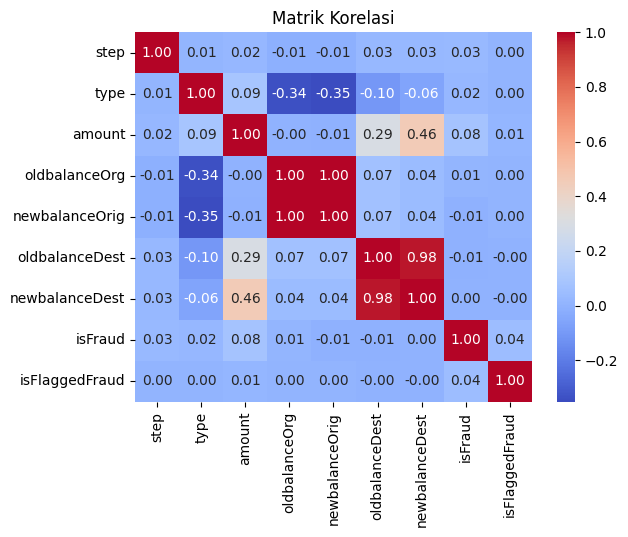

In [19]:
sns.heatmap(b, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrik Korelasi')
plt.show()

### Spliting Data

In [20]:
X = data_prep.drop(['isFraud', 'isFlaggedFraud','nameDest','nameOrig'], axis=1)
y = data_prep['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling Feature

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler()
model = sc.fit(X)
X = model.transform(X)
X

array([[-1.70304158,  0.95239932, -0.28155992, ..., -0.2376217 ,
        -0.3238139 , -0.33341141],
       [-1.70304158,  0.95239932, -0.29476726, ..., -0.2858123 ,
        -0.3238139 , -0.33341141],
       [-1.70304158,  1.69307616, -0.2975548 , ..., -0.29244171,
        -0.3238139 , -0.33341141],
       ...,
       [ 3.51012348, -0.52895436, 10.1539526 , ..., -0.29244171,
        -0.30366526,  1.403027  ],
       [ 3.51012348,  1.69307616,  1.1097649 , ..., -0.29244171,
        -0.3238139 , -0.33341141],
       [ 3.51012348, -0.52895436,  1.1097649 , ..., -0.29244171,
         1.59138312,  1.6698123 ]])